In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

Validation NNGP accuracy: 0.5291
Validation NTK accuracy: 0.5116
Test NNGP accuracy: 0.4169
Test NTK accuracy: 0.4112


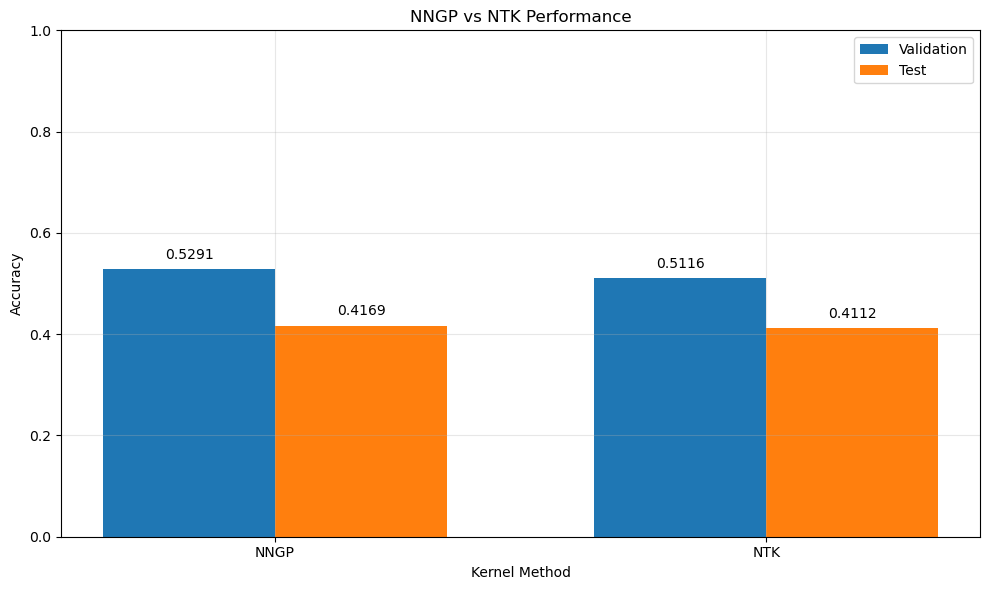

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Load evaluation files
valid_data = np.load('best_kernels_valid.npz')
test_data = np.load('best_kernels_test.npz')

# Extract accuracy metrics
valid_acc_nngp = valid_data['acc_nngp']
valid_acc_ntk = valid_data['acc_ntk']
test_acc_nngp = test_data['acc_nngp']
test_acc_ntk = test_data['acc_ntk']

# Print metrics
print(f"Validation NNGP accuracy: {valid_acc_nngp:.4f}")
print(f"Validation NTK accuracy: {valid_acc_ntk:.4f}")
print(f"Test NNGP accuracy: {test_acc_nngp:.4f}")
print(f"Test NTK accuracy: {test_acc_ntk:.4f}")

# Create bar plot to visualize accuracies
plt.figure(figsize=(10, 6))
x = ['NNGP', 'NTK']
valid_accs = [valid_acc_nngp, valid_acc_ntk]
test_accs = [test_acc_nngp, test_acc_ntk]

x_pos = np.arange(len(x))
width = 0.35

plt.bar(x_pos - width/2, valid_accs, width, label='Validation')
plt.bar(x_pos + width/2, test_accs, width, label='Test')

plt.xlabel('Kernel Method')
plt.ylabel('Accuracy')
plt.title('NNGP vs NTK Performance')
plt.xticks(x_pos, x)
plt.ylim(0, 1.0)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid(True, alpha=0.3)

# Add text labels above bars
for i, v in enumerate(valid_accs):
    plt.text(i - width/2, v + 0.02, f'{v:.4f}', ha='center')
    
for i, v in enumerate(test_accs):
    plt.text(i + width/2, v + 0.02, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.savefig('kernel_accuracy_comparison.png', dpi=300)
plt.show()

Keys in best.npz: ['images', 'labels', 'k', 'jit']
Distilled dataset shape: (100, 3, 32, 32)


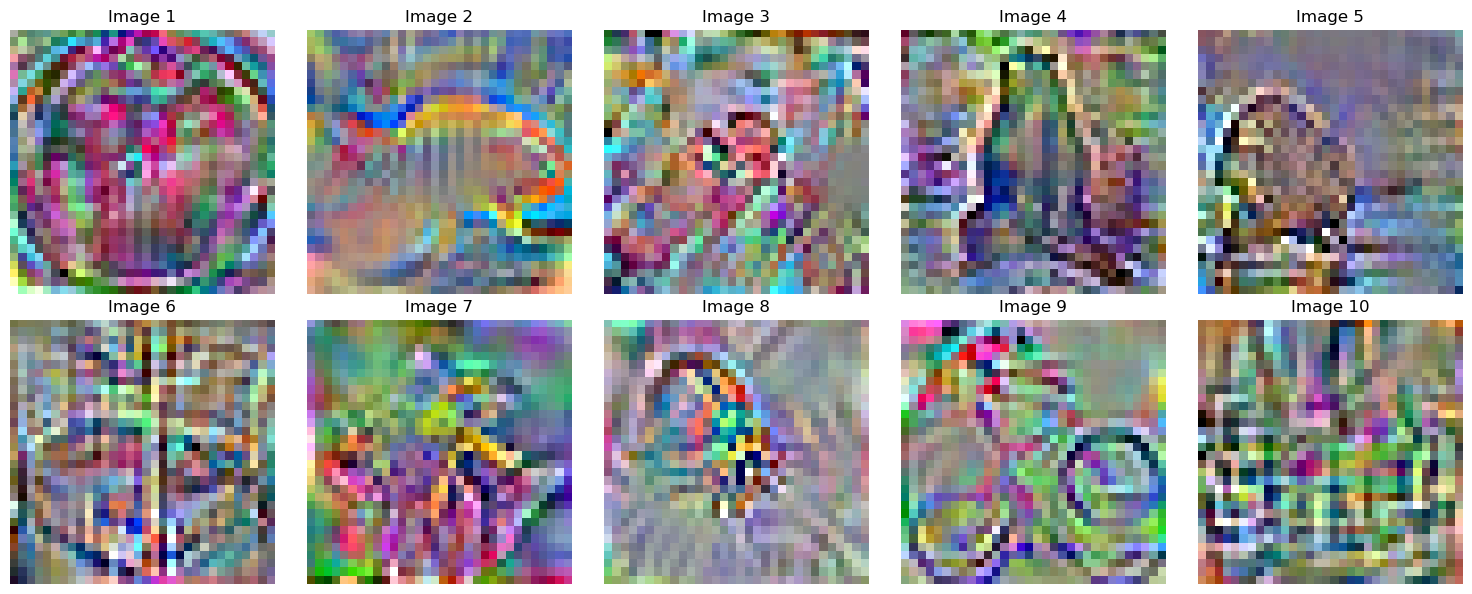

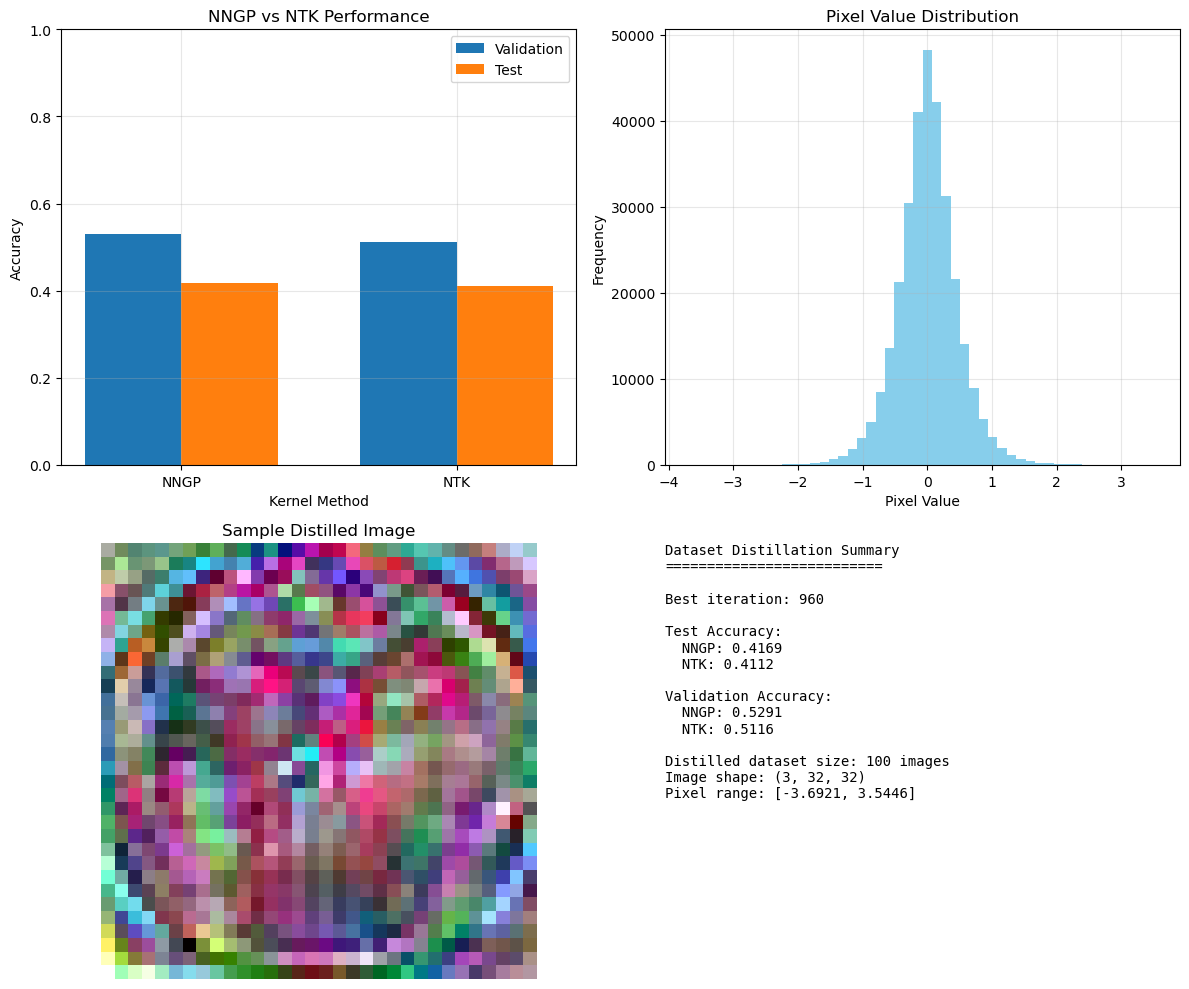

In [7]:


# Load best distilled dataset (960.npz/best.npz)
best_distilled = np.load('best.npz')  # or '960.npz'

# Check what's in the distilled dataset
print("Keys in best.npz:", best_distilled.files)

# Load and extract the distilled images
if 'images' in best_distilled.files:
    distilled_images = best_distilled['images']
    print(f"Distilled dataset shape: {distilled_images.shape}")
else:
    print("Note: 'images' key not found in best.npz. Available keys:", best_distilled.files)

# Function to process and visualize distilled images
def visualize_distilled_dataset(images, num_samples=10):
    # Apply robust scaling for visualization
    def robust_scale(img):
        q_min, q_max = np.percentile(img, [1, 99])
        if q_max > q_min:
            img_scaled = (img - q_min) / (q_max - q_min)
        else:
            img_scaled = img - q_min
        return np.clip(img_scaled, 0, 1)
    
    # Create figure
    rows = (num_samples + 4) // 5  # Ceiling division
    plt.figure(figsize=(15, 3*rows))
    
    for i in range(min(num_samples, len(images))):
        plt.subplot(rows, 5, i+1)
        
        img = images[i]
        img = robust_scale(img)
        
        # Handle channel dimension
        if img.shape[0] == 1 or img.shape[0] == 3:  # Channel-first
            img = np.transpose(img, (1, 2, 0))
        
        if len(img.shape) > 2 and img.shape[2] == 1:  # Grayscale
            plt.imshow(img.squeeze(), cmap='gray')
        else:  # RGB
            plt.imshow(img)
        
        plt.title(f"Image {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('best_distilled_images.png', dpi=300)
    plt.show()

# Visualize the best distilled dataset
if 'images' in best_distilled.files:
    visualize_distilled_dataset(distilled_images)


# Create comprehensive summary report
def create_summary_report():
    plt.figure(figsize=(12, 10))
    
    # Subplot 1: NNGP vs NTK on Test and Validation
    plt.subplot(2, 2, 1)
    x = ['NNGP', 'NTK']
    valid_accs = [valid_acc_nngp, valid_acc_ntk]
    test_accs = [test_acc_nngp, test_acc_ntk]
    
    x_pos = np.arange(len(x))
    width = 0.35
    
    plt.bar(x_pos - width/2, valid_accs, width, label='Validation')
    plt.bar(x_pos + width/2, test_accs, width, label='Test')
    
    plt.xlabel('Kernel Method')
    plt.ylabel('Accuracy')
    plt.title('NNGP vs NTK Performance')
    plt.xticks(x_pos, x)
    plt.ylim(0, 1.0)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Pixel Value Distribution
    plt.subplot(2, 2, 2)
    if 'images' in best_distilled.files:
        plt.hist(distilled_images.flatten(), bins=50, color='skyblue')
        plt.title('Pixel Value Distribution')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
    
    # Subplot 3: Sample Image
    plt.subplot(2, 2, 3)
    if 'images' in best_distilled.files and len(distilled_images) > 0:
        img = distilled_images[0]
        
        # Robust scaling
        q_min, q_max = np.percentile(img, [1, 99])
        if q_max > q_min:
            img = (img - q_min) / (q_max - q_min)
        img = np.clip(img, 0, 1)
        
        if img.shape[0] == 1 or img.shape[0] == 3:
            img = np.transpose(img, (1, 2, 0))
        
        if len(img.shape) > 2 and img.shape[2] == 1:
            plt.imshow(img.squeeze(), cmap='gray')
        else:
            plt.imshow(img)
        
        plt.title('Sample Distilled Image')
        plt.axis('off')
    
    # Subplot 4: Performance summary text
    plt.subplot(2, 2, 4)
    plt.axis('off')
    summary_text = (
        f"Dataset Distillation Summary\n"
        f"==========================\n\n"
        f"Best iteration: 960\n\n"
        f"Test Accuracy:\n"
        f"  NNGP: {test_acc_nngp:.4f}\n"
        f"  NTK: {test_acc_ntk:.4f}\n\n"
        f"Validation Accuracy:\n"
        f"  NNGP: {valid_acc_nngp:.4f}\n"
        f"  NTK: {valid_acc_ntk:.4f}\n"
    )
    
    if 'images' in best_distilled.files:
        summary_text += f"\nDistilled dataset size: {len(distilled_images)} images\n"
        summary_text += f"Image shape: {distilled_images[0].shape}\n"
        summary_text += f"Pixel range: [{distilled_images.min():.4f}, {distilled_images.max():.4f}]"
    
    plt.text(0, 1.0, summary_text, fontsize=10, 
             verticalalignment='top', fontfamily='monospace')
    
    plt.tight_layout()
    plt.savefig('distillation_summary.png', dpi=300)
    plt.show()

# Generate summary report
create_summary_report()